> # **Softmax Regression**
> Softmax regression is an `extension of logistic regression` for `multi-class classification` problems. Given a set of input features x and corresponding labels y (one-hot encoded vectors).
<br><br>
> - The softmax function is used to compute the probabilities `(Softmax Function)`:
<br><br>
> 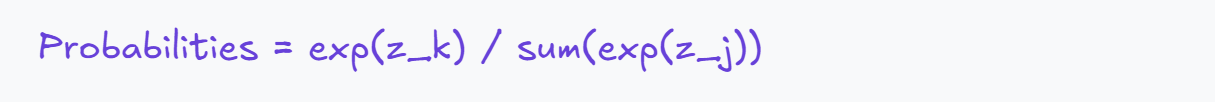
<br><br>
> - `Cost Function`:
> The cost function for softmax regression is the cross-entropy loss:
<br><br>
> 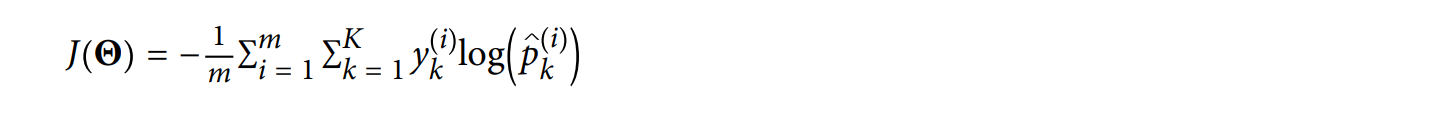
<br><br>
> - Derivative:
> The derivative of the cost function with respect to the logit z_k is:
<br><br>
> 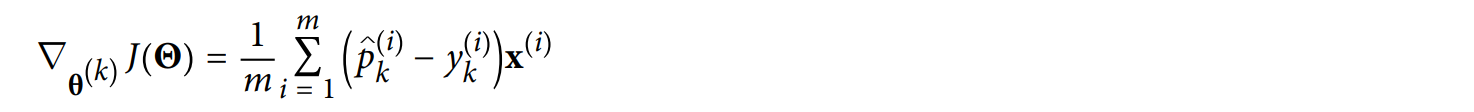
> This derivative represents the difference between the predicted probability and the true probability, which is used to update the model parameters during training.

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions # For plotting decision boundries of multiclass
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = load_iris(as_frame=True)
data.data['target'] = data.target
df = data.data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
X = df.iloc[:, 2:4]
y = df.loc[:, 'target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<HR>

> ### SOFTMAX REGRESSION FROM SCRATCH

In [ ]:
class SoftmaxRegression:
    def __init__(self, lr=0.01, epochs=1000, lambda_reg=0.01) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.epochs = epochs
        self.learning_rate = lr
        self.lambda_reg = lambda_reg  # Regularization parameter
    
    def softmax(self, z):
        """Compute the softmax for each row of the input z."""
        return np.exp(z) / np.sum(np.exp(z), axis=1, keepdims=True)
    
    def fit(self, X_train, y_train):
        X_train, y_train = np.array(X_train), np.array(y_train)
        """Fit the model to the training data."""
        # Add intercept term
        X_train = np.insert(X_train, 0, 1, axis=1)
        y_train = y_train.reshape(-1, 1)
        num_samples, num_features = X_train.shape
        num_classes = np.max(y_train) + 1

        # Initialize weights - ➡️ 
        self.weights_ = np.zeros((num_features, num_classes))
        
        # Convert y_train to one-hot encoding
        y_train_one_hot = np.zeros((num_samples, num_classes))
        y_train_one_hot[np.arange(num_samples), y_train.flatten()] = 1
        
        for epoch in range(self.epochs):
            # Shuffle the data
            indices = np.arange(num_samples)
            np.random.shuffle(indices)
            
            for i in indices: # Selecting one sample at a time is important
                X_sample = X_train[i:i+1]
                y_sample = y_train_one_hot[i:i+1]
                
                # Compute predictions
                predictions = self.softmax(np.dot(X_sample, self.weights_))
                
                # Compute gradient - no.gradients = no. classes
                gradient = np.dot(X_sample.T, (predictions - y_sample)) / num_samples
                
                # Update weights
                self.weights_ -= self.learning_rate * gradient
        
        # Extract coefficients and intercepts
        self.intercept_ = self.weights_[0, :]
        self.coef_ = self.weights_[1:, :]
    
    def predict(self, X):
        """Predict the class labels for the input data."""
        X = np.insert(X, 0, 1, axis=1)  # Add intercept term
        predictions = self.softmax(np.dot(X, self.weights_))
        return np.argmax(predictions, axis=1)
    
    def predict_proba(self, X):
        """Predict the class probabilities for the input data."""
        X = np.insert(X, 0, 1, axis=1)  # Add intercept term
        return self.softmax(np.dot(X, self.weights_))

In [5]:
clf = SoftmaxRegression(lr = 0.1, epochs=1000)
clf.fit(X_train, y_train)
print(clf.coef_, clf.intercept_)

[[-0.94970967  0.59123761  0.35847206]
 [-1.82163696 -0.62086872  2.44250568]] [ 4.46997627 -0.35513107 -4.1148452 ]


In [6]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.9664109121909632

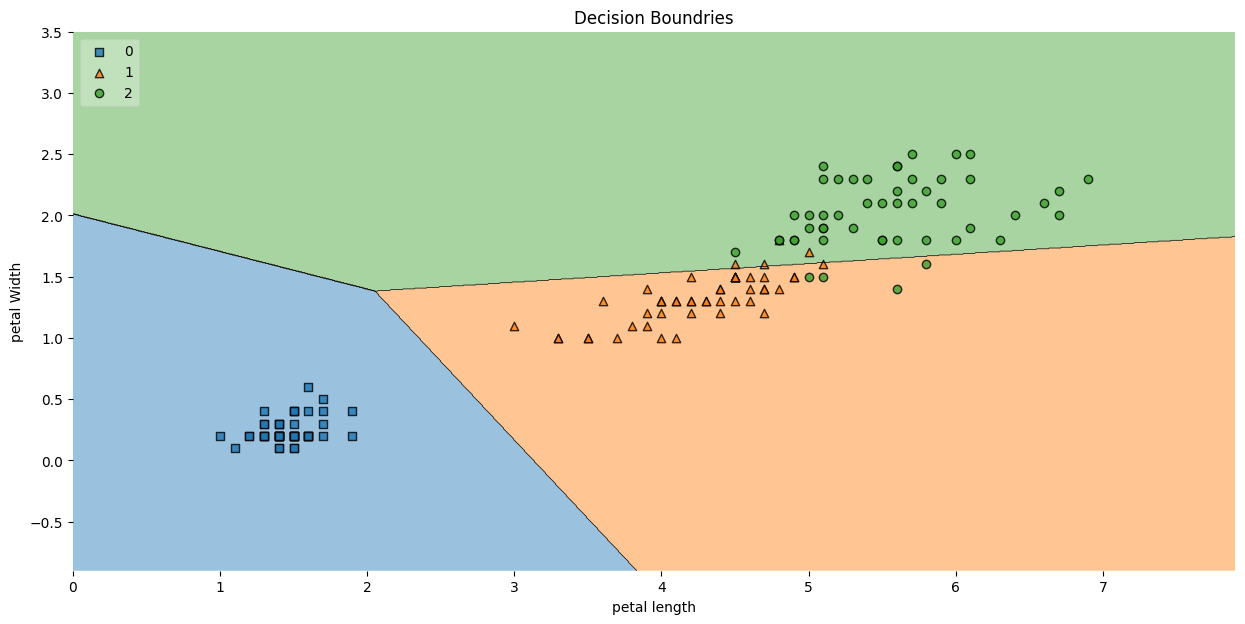

In [7]:
plt.figure(figsize=(15, 7))
plot_decision_regions(X.values, y.values, clf, legend = 2)

plt.xlabel("petal length")
plt.ylabel("petal Width")
plt.title("Decision Boundries")
plt.show()

<hr>

> ### `LogisticRegression(multi_class='multinomial')` - sklearn class
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
> - For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
> - For multiclass problems, all solvers except ‘liblinear’ minimize the full multinomial loss;
> - ‘liblinear’ can only handle binary classification by default. To apply a one-versus-rest scheme for the multiclass setting one can wrap it with the OneVsRestClassifier.
> - ‘newton-cholesky’ is a good choice for n_samples >> n_features * n_classes, especially with one-hot encoded categorical features with rare categories. Be aware that the memory usage of this solver has a quadratic dependency on n_features * n_classes because it explicitly computes the full Hessian matrix.

In [8]:
clf = LogisticRegression(
    penalty = 'elasticnet',
    dual = False,
    tol = 1e-5,
    C = 0.001,
    fit_intercept = True,
    solver = 'saga',
    max_iter = 1000,
    verbose = 1,
    warm_start = False,
    n_jobs = -1,
    l1_ratio = 0.01, # Setting l1_ratio=0 is equivalent to using penalty='l2', while setting l1_ratio=1 is equivalent to using penalty='l1'
    # class_weight = {0: 1, 1: 1}, # dict
    # multi_class = 'multinomial' - deprecated
)
clf.fit(X_train, y_train)
print(clf.coef_, clf.intercept_, sep='\n') # 3 intercept and 6 weights

convergence after 19 epochs took 0 seconds
[[-0.07231692 -0.02382198]
 [ 0.00938654  0.        ]
 [ 0.05282936  0.01883974]]
[ 0.27961978 -0.01963405 -0.25998572]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


In [9]:
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

1.0

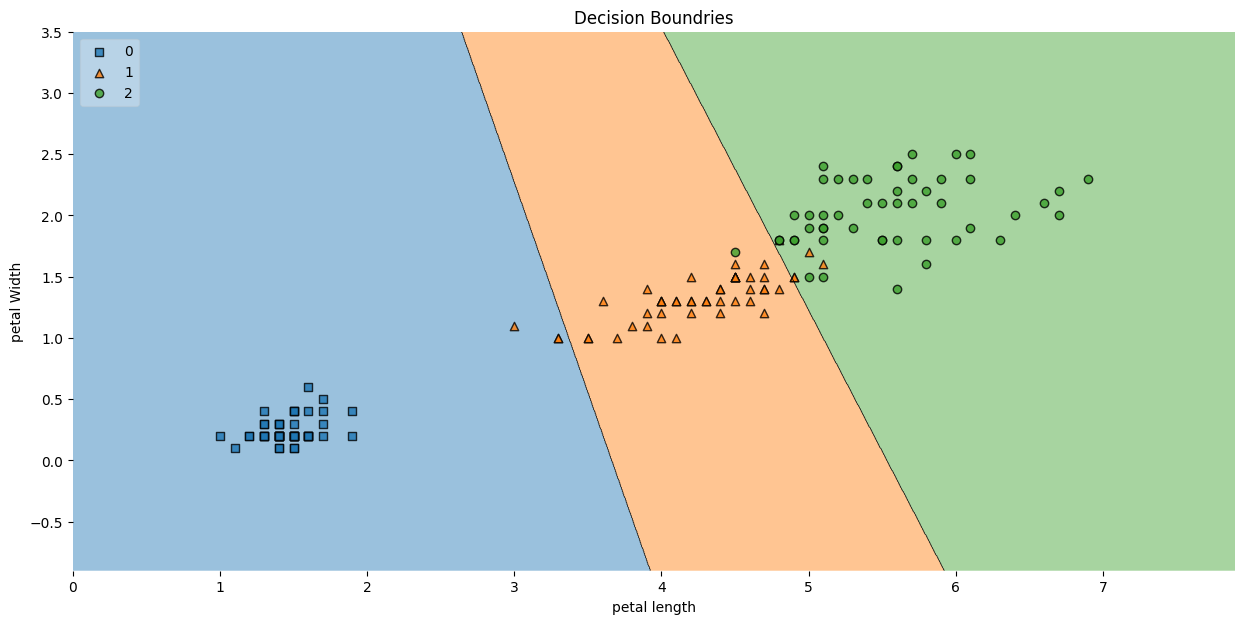

In [10]:
plt.figure(figsize=(15, 7))
plot_decision_regions(X.values, y.values, clf, legend = 2)

plt.xlabel("petal length")
plt.ylabel("petal Width")
plt.title("Decision Boundries")
plt.show()

---

> ### `LogisticRegression(multi_class='ovr')` - sklearn class

In [6]:
clf = LogisticRegression(
    penalty = 'elasticnet',
    dual = False,
    tol = 1e-5,
    C = 0.001,
    fit_intercept = True,
    solver = 'saga',
    max_iter = 1000,
    verbose = 1,
    warm_start = False,
    n_jobs = -1,
    l1_ratio = 0.01,
    multi_class = 'ovr'
)
clf.fit(X_train, y_train)
print(clf.coef_, clf.intercept_, sep='\n') # 3 intercept and 6 weights

convergence after 34 epochs took 1 seconds
convergence after 31 epochs took 1 seconds
convergence after 30 epochs took 1 seconds
[[-0.07487774 -0.02488859]
 [ 0.01035898  0.        ]
 [ 0.05544232  0.01993144]]
[-0.38826024 -0.69452728 -0.96323471]


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished


In [8]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.966750208855472

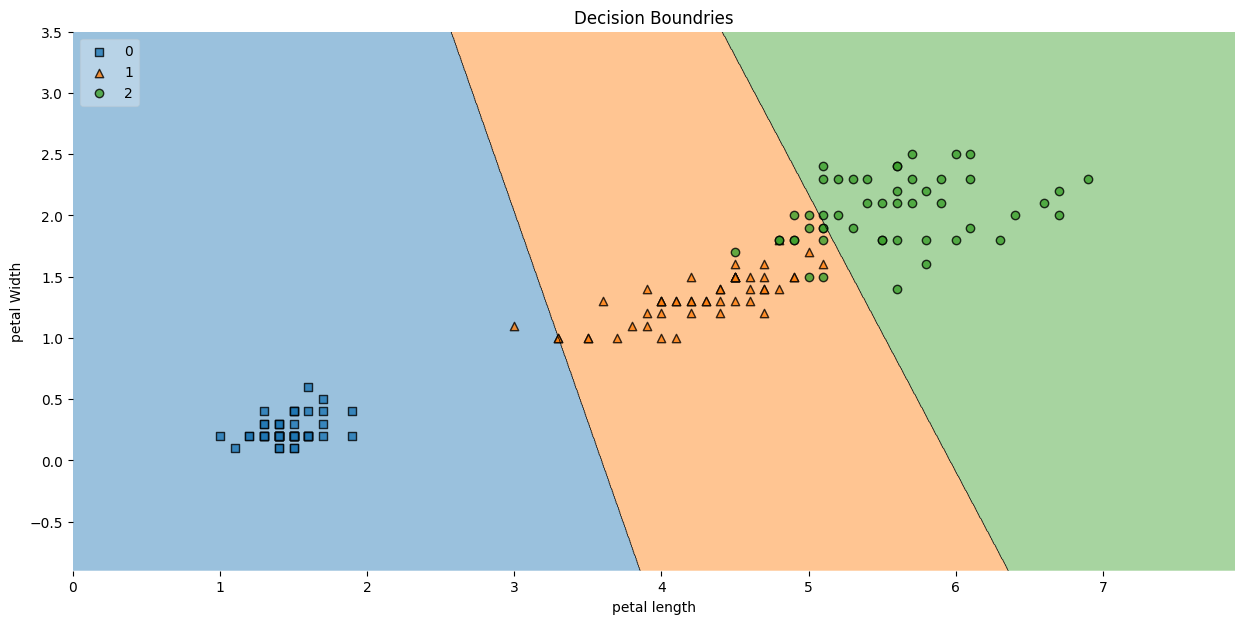

In [9]:
plt.figure(figsize=(15, 7))
plot_decision_regions(X.values, y.values, clf, legend = 2)

plt.xlabel("petal length")
plt.ylabel("petal Width")
plt.title("Decision Boundries")
plt.show()